In [1]:
source(paste0(file.path("/","mnt","hadoop_tmp","working","Rcode"),"/",list.files(file.path("/","mnt","hadoop_tmp","working","Rcode"),pattern = "_proteome.r$")))



Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: httr

Loading required package: stringr

Loading required package: pbapply

Loading required package: reshape2


Attaching package: ‘reshape2’


The following objects are masked from ‘package:data.table’:

    dcast, melt




In [2]:
getwd()
path <- file.path("/","mnt","hadoop_tmp","working","2022 YEO","2023_BV_siIft88_Exo_220818")
rawPD<-list.files(path, pattern = "_Proteins.txt$")
#infoPD<-list.files(path, pattern = "_InputFiles.txt$")
print(rawPD)
#path1 <- system.file("extdata", package="wrProteo")
#fiNaPd <- "pxd001819_PD24_Proteins.txt.gz"

[1] "/mnt/hadoop_tmp/working/2022 YEO/2023_BV_siIft88_Exo_220818"

[1] "230314_BV_ExoSIi_220818_Proteins.txt"


In [3]:
datafromPD<-lapply(rawPD, function(file){
  return(fread(paste0(path,"/",file)))
})



require(stringr)
for(i in seq_len(length(datafromPD))){
  colnames(datafromPD[[i]])<-str_replace_all(colnames(datafromPD[[i]]),"[ ]",".")
  colnames(datafromPD[[i]])<-str_replace_all(colnames(datafromPD[[i]]),"[-]","_")
}

counts<-lapply(datafromPD, function(data){
  cts<-data %>% base::subset(select = c("Accession",grep("^Abundances.Normalized.", colnames(data), value=TRUE))) 
  return(cts)
})

In [4]:
k = 1 # select number number from "print(rawPD)"
colnames(counts[[k]])

[1] "Accession"                                     
 [2] "Abundances.Normalized.F1.Sample.Con"           
 [3] "Abundances.Normalized.F2.Sample.Con"           
 [4] "Abundances.Normalized.F3.Sample.Con"           
 [5] "Abundances.Normalized.F4.Sample.Con"           
 [6] "Abundances.Normalized.F5.Sample.Con_Abeta"     
 [7] "Abundances.Normalized.F6.Sample.Con_Abeta"     
 [8] "Abundances.Normalized.F7.Sample.Con_Abeta"     
 [9] "Abundances.Normalized.F8.Sample.Con_Abeta"     
[10] "Abundances.Normalized.F9.Sample.siIft88"       
[11] "Abundances.Normalized.F10.Sample.siIft88"      
[12] "Abundances.Normalized.F11.Sample.siIft88"      
[13] "Abundances.Normalized.F12.Sample.siIft88"      
[14] "Abundances.Normalized.F13.Sample.siIft88_Abeta"
[15] "Abundances.Normalized.F14.Sample.siIft88_Abeta"
[16] "Abundances.Normalized.F15.Sample.siIft88_Abeta"
[17] "Abundances.Normalized.F16.Sample.siIft88_Abeta"

In [5]:
############# Modify variables based on "colnames(counts[[k]])"
y.count<-list("Control"=subset(counts[[k]], select = c("Accession",grep("_Con$", colnames(counts[[k]]), value=TRUE))),
              "Con+Abeta"=subset(counts[[k]], select = c("Accession",grep("Con_Abeta$", colnames(counts[[k]]), value=TRUE))),
              "siIft88"=subset(counts[[k]], select = c("Accession",grep("_siIft88", colnames(counts[[k]]), value=TRUE))),
              "siIft88+Abeta"=subset(counts[[k]], select = c("Accession",grep("_siIft88_Abeta$", colnames(counts[[k]]), value=TRUE))))


Loading required package: ggVennDiagram



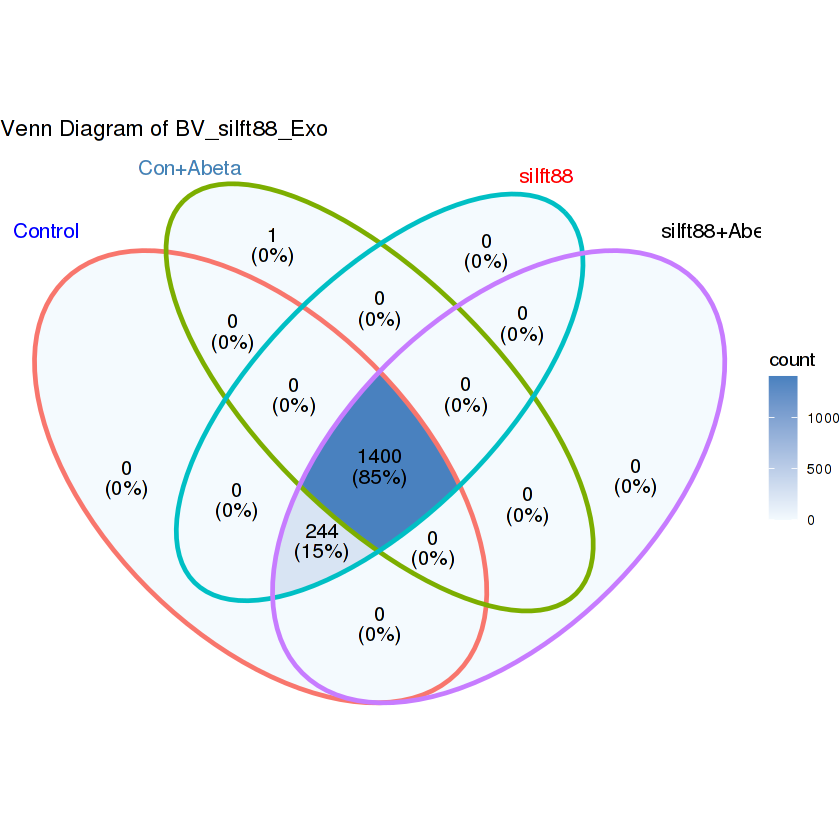

In [6]:
y <- list("Control"= y.count[[1]]$Accession[unique(c(unlist(apply(y.count[[1]], 2, function(x) which(!is.na(x)))[-1])))],
          "Con+Abeta"= y.count[[2]]$Accession[unique(c(unlist(apply(y.count[[2]], 2, function(x) which(!is.na(x)))[-1])))],
          "siIft88"= y.count[[3]]$Accession[unique(c(unlist(apply(y.count[[3]], 2, function(x) which(!is.na(x)))[-1])))],
           "siIft88+Abeta"= y.count[[4]]$Accession[unique(c(unlist(apply(y.count[[4]], 2, function(x) which(!is.na(x)))[-1])))])

require(ggVennDiagram)
p<-ggVennDiagram(y, label_alpha = 0, 
          color =  c("A" = "blue","B" ="steelblue","C" = "red", "'D" = "black") ,
          set_color = c("A" = "blue","B" ="steelblue", "C" = "red", "D" = "black")) + 
#                                                                      scale_fill_distiller(palette = "RdBu")+
    scale_fill_gradient(low = "#F4FAFE", high = "#4981BF")              +
    ggtitle("Venn Diagram of BV_siIft88_Exo")
print(p)
                                                                     
ggsave(paste0(path,"/results/Figure_EVvenn_All.pdf"), p, width =5, height =5, units = "in", device = "pdf", dpi = 600)
                                                                         

In [7]:
############# Modify variables based on "colnames(counts[[k]])"
y.count<-list("Con+Abeta"=subset(counts[[k]], select = c("Accession",grep("Con_Abeta$", colnames(counts[[k]]), value=TRUE))),
              "siIft88+Abeta"=subset(counts[[k]], select = c("Accession",grep("_siIft88_Abeta$", colnames(counts[[k]]), value=TRUE))))


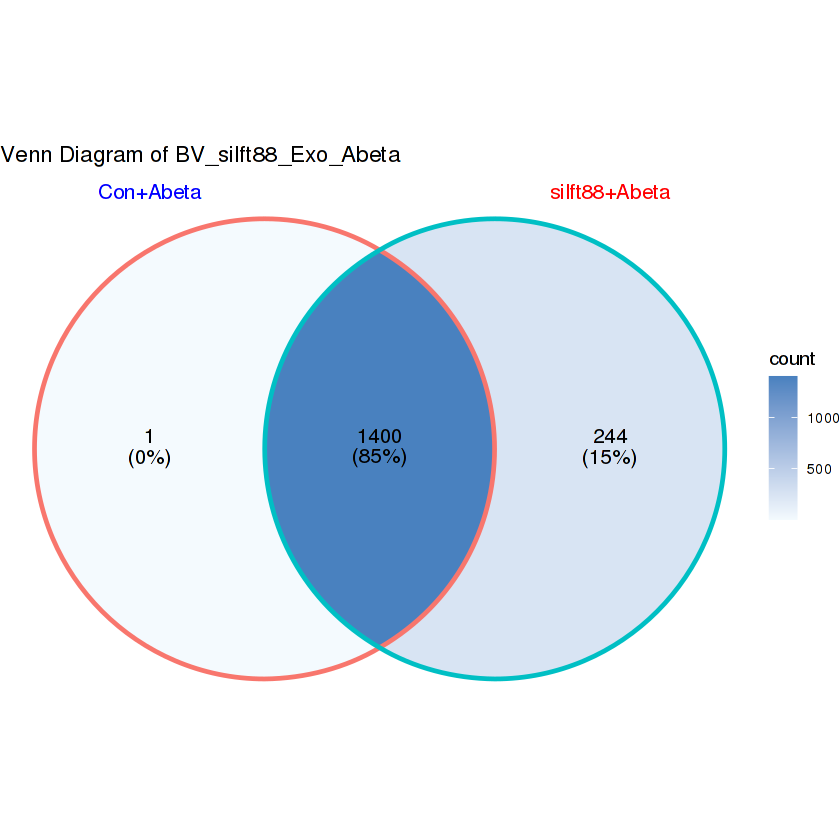

In [8]:
y <- list("Con+Abeta"= y.count[[1]]$Accession[unique(c(unlist(apply(y.count[[1]], 2, function(x) which(!is.na(x)))[-1])))],
          "siIft88+Abeta"= y.count[[2]]$Accession[unique(c(unlist(apply(y.count[[2]], 2, function(x) which(!is.na(x)))[-1])))])

require(ggVennDiagram)
p<-ggVennDiagram(y, label_alpha = 0, 
          color =  c("A" = "blue","B" ="red") ,
          set_color = c("A" = "blue","B" ="red")) + 
#                                                                      scale_fill_distiller(palette = "RdBu")+
    scale_fill_gradient(low = "#F4FAFE", high = "#4981BF")              +
    ggtitle("Venn Diagram of BV_siIft88_Exo_Abeta")
print(p)
                                                                     
ggsave(paste0(path,"/results/Figure_venn.pdf"), p, width =5, height =5, units = "in", device = "pdf", dpi = 600)
                                                                        
                                                                         

In [9]:
resultUNIPROT <- pbapply::pblapply(datafromPD[[k]]$Accession,function(ids){ #[-grep("ProteinCenter:sp_incl_isoforms",datafromPD$Accession)]
    data <- uniprot_mapping(ids)
    content(data, as= "text", encoding = 'UTF-8')
    res<-unlist(str_split(unlist(str_split(unlist(str_split(content(data, as= "text", encoding = 'UTF-8'),"\\t")),"\\n"))[4]," "))[1]
    return(res)
  })
  
  results_from_uniprot <- data.frame('Accession' = datafromPD[[k]]$Accession,  #[-grep("ProteinCenter:sp_incl_isoforms",datafromPD$Accession)]
                                     'Gene.names' = unlist(resultUNIPROT))
  require(stringi)
  # str_sub(datafromPD[[k]]$Description[1], #[-grep("ProteinCenter:sp_incl_isoforms",datafromPD$Accession)]
  #         str_locate(datafromPD[[k]]$Description[1],pattern = "GN=")[2]+1, #[-grep("ProteinCenter:sp_incl_isoforms",datafromPD$Accession)]
  #         str_locate(datafromPD[[k]]$Description[1],pattern = "PE=")[1]-2) #[-grep("ProteinCenter:sp_incl_isoforms",datafromPD$Accession)]
  # seq_len(length(dataPD$Description))
  result<-lapply(datafromPD[[k]]$Description, function(desc){ #[-grep("ProteinCenter:sp_incl_isoforms",datafromPD$Accession)]
    # str_sub(grep("GN=",unlist(str_split(desc, " ")), value = TRUE),start = 4L)
    str_sub(desc, 
            str_locate(desc,pattern = "GN=")[2]+1,
            str_locate(desc,pattern = "PE=")[1]-2)
  })
  
  result<-make.unique(unlist(result))
  
  results_from_datasheet <- data.frame('Protein.IDs' = datafromPD[[k]]$"Accession",  'Gene.names' = result) #[-grep("ProteinCenter:sp_incl_isoforms",datafromPD$Accession)]
  results_from_uniprot <- na.omit(results_from_uniprot)
  results_from_uniprot$Gene.names[which(results_from_uniprot$Gene.names=="")] <- result[which(datafromPD[[k]]$"Accession" %in% results_from_uniprot$Accession[which(results_from_uniprot$Gene.names=="")])]
  
  dat<-merge(counts[[k]], results_from_uniprot, by = "Accession")
  
  data_unique <- make_unique(dat, "Gene.names", "Accession", delim = ";")

  |::::::::::::::::::::::::::::::::::::::::::::::::::| 100%


Loading required package: stringi



In [10]:
colnames(datafromPD[[k]])

[1] "Checked"                                                        
  [2] "Protein.FDR.Confidence.Combined"                                
  [3] "Master"                                                         
  [4] "Accession"                                                      
  [5] "Description"                                                    
  [6] "Exp.q_value.Combined"                                           
  [7] "Sum.PEP.Score"                                                  
  [8] "Coverage.in.Percent"                                            
  [9] "Number.of.Peptides"                                             
 [10] "Number.of.PSMs"                                                 
 [11] "Number.of.Unique.Peptides"                                      
 [12] "Number.of.AAs"                                                  
 [13] "MW.in.kDa"                                                      
 [14] "calc.pI"                                                        
 [15] "Score.Sequest.HT.Sequest.HT"                                    
 [16] "Number.of.Peptides.by.Search.Engine.Sequest.HT"                 
 [17] "Biological.Process"                                             
 [18] "Cellular.Component"                                             
 [19] "Molecular.Function"                                             
 [20] "Pfam.IDs"                                                       
 [21] "Entrez.Gene.ID"                                                 
 [22] "Gene.Symbol"                                                    
 [23] "Gene.ID"                                                        
 [24] "Ensembl.Gene.ID"                                                
 [25] "Reactome.Pathways"                                              
 [26] "WikiPathways"                                                   
 [27] "Number.of.Protein.Pathway.Groups"                               
 [28] "Number.of.Razor.Peptides"                                       
 [29] "Abundance.Ratio.Con_Abeta..Con"                                 
 [30] "Abundance.Ratio.siIft88..Con"                                   
 [31] "Abundance.Ratio.siIft88_Abeta..Con_Abeta"                       
 [32] "Abundance.Ratio.siIft88_Abeta..siIft88"                         
 [33] "Abundance.Ratio.log2.Con_Abeta..Con"                            
 [34] "Abundance.Ratio.log2.siIft88..Con"                              
 [35] "Abundance.Ratio.log2.siIft88_Abeta..Con_Abeta"                  
 [36] "Abundance.Ratio.log2.siIft88_Abeta..siIft88"                    
 [37] "Abundance.Ratio.P_Value.Con_Abeta..Con"                         
 [38] "Abundance.Ratio.P_Value.siIft88..Con"                           
 [39] "Abundance.Ratio.P_Value.siIft88_Abeta..Con_Abeta"               
 [40] "Abundance.Ratio.P_Value.siIft88_Abeta..siIft88"                 
 [41] "Abundance.Ratio.Adj.P_Value.Con_Abeta..Con"                     
 [42] "Abundance.Ratio.Adj.P_Value.siIft88..Con"                       
 [43] "Abundance.Ratio.Adj.P_Value.siIft88_Abeta..Con_Abeta"           
 [44] "Abundance.Ratio.Adj.P_Value.siIft88_Abeta..siIft88"             
 [45] "Abundance.Ratio.Variability.in.Percent.Con_Abeta..Con"          
 [46] "Abundance.Ratio.Variability.in.Percent.siIft88..Con"            
 [47] "Abundance.Ratio.Variability.in.Percent.siIft88_Abeta..Con_Abeta"
 [48] "Abundance.Ratio.Variability.in.Percent.siIft88_Abeta..siIft88"  
 [49] "Abundance.Ratio.Weight.Con_Abeta..Con"                          
 [50] "Abundance.Ratio.Weight.siIft88..Con"                            
 [51] "Abundance.Ratio.Weight.siIft88_Abeta..Con_Abeta"                
 [52] "Abundance.Ratio.Weight.siIft88_Abeta..siIft88"                  
 [53] "Abundance.F1.Sample.Con"                                        
 [54] "Abundance.F2.Sample.Con"                                        
 [55] "Abundance.F3.Sample.Con"                                        
 [56] "Abundance.F4.Sample.Con"           

In [11]:
############# Part 2. Not imputed
data <-  merge(datafromPD[[k]], results_from_uniprot, by = "Accession")

data.merged_neo <- subset(data, select=c("Gene.names","Accession",grep("^Abundance.Ratio.log2.|^Abundance.Ratio.Weight.|^Abundance.Ratio.Adj.P_Value",colnames(data), value = TRUE)))

colnames(data.merged_neo)

[1] "Gene.names"                                          
 [2] "Accession"                                           
 [3] "Abundance.Ratio.log2.Con_Abeta..Con"                 
 [4] "Abundance.Ratio.log2.siIft88..Con"                   
 [5] "Abundance.Ratio.log2.siIft88_Abeta..Con_Abeta"       
 [6] "Abundance.Ratio.log2.siIft88_Abeta..siIft88"         
 [7] "Abundance.Ratio.Adj.P_Value.Con_Abeta..Con"          
 [8] "Abundance.Ratio.Adj.P_Value.siIft88..Con"            
 [9] "Abundance.Ratio.Adj.P_Value.siIft88_Abeta..Con_Abeta"
[10] "Abundance.Ratio.Adj.P_Value.siIft88_Abeta..siIft88"  
[11] "Abundance.Ratio.Weight.Con_Abeta..Con"               
[12] "Abundance.Ratio.Weight.siIft88..Con"                 
[13] "Abundance.Ratio.Weight.siIft88_Abeta..Con_Abeta"     
[14] "Abundance.Ratio.Weight.siIft88_Abeta..siIft88"

In [69]:
data_export <- subset(data, select=c("Gene.names","Accession",grep("^Abundance.Ratio.log2.|^Abundance.Ratio.P_Value|^Abundance.Ratio.Adj.P_Value",colnames(data), value = TRUE))) 
data_exports <-subset(data_export, select=c("Gene.names","Accession",grep("siIft88_Abeta..Con_Abeta$",colnames(data_export), value = TRUE)))

require(xlsx)
write.xlsx(data_exports, paste0(path,"/results/Figure6e_BVsiIft88_exosome.xlsx"))

In [16]:
objDat <- subset(data.merged_neo, select=c("Gene.names","Accession",grep("siIft88_Abeta..Con_Abeta$",colnames(data.merged_neo), value = TRUE)))
print(colnames(objDat))
colnames(objDat)<- c('Gene.names','Accession','Abundance.Ratio.log2','Abundance.Ratio.P_Value','Abundance.Ratio.Weight')


[1] "Gene.names"                                          
[2] "Accession"                                           
[3] "Abundance.Ratio.log2.siIft88_Abeta..Con_Abeta"       
[4] "Abundance.Ratio.Adj.P_Value.siIft88_Abeta..Con_Abeta"
[5] "Abundance.Ratio.Weight.siIft88_Abeta..Con_Abeta"     


In [34]:
insGenes <- objDat %>% dplyr::filter(Abundance.Ratio.log2 > 0.25 & Abundance.Ratio.P_Value < 0.05) %>% pull(Gene.names)
insGenes.n <- objDat %>% dplyr::filter(Abundance.Ratio.log2 < -0.25 & Abundance.Ratio.P_Value < 0.05) %>% pull(Gene.names)

In [70]:
na.omit(insGenes) %>% length()
na.omit(insGenes.n) %>% length()

[1] 76

[1] 196

In [19]:
library(enrichR)
library(httr)
# Check available databases to perform enrichment (then choose one)
databases <- enrichR::listEnrichrDbs()$libraryName

# insGenes <- mg.subset.DE[[id]] %>% dplyr::filter(p_val < 0.01  & avg_log2FC < -0.25) %>% rownames()



Welcome to enrichR
Checking connection ... 

Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!



In [35]:
enrich_results <- enrichr(genes = insGenes, databases = grep("GO|Reactome|Wiki|KEGG",databases, value = TRUE)[c(28, 34, 36:38)])
enrich_results.n <- enrichr(genes = insGenes.n, databases = grep("GO|Reactome|Wiki|KEGG",databases, value = TRUE)[c(28, 34, 36:38)])

Uploading data to Enrichr... Done.
  Querying KEGG_2019_Mouse... Done.
  Querying Reactome_2022... Done.
  Querying GO_Biological_Process_2023... Done.
  Querying GO_Cellular_Component_2023... Done.
  Querying GO_Molecular_Function_2023... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying KEGG_2019_Mouse... Done.
  Querying Reactome_2022... Done.
  Querying GO_Biological_Process_2023... Done.
  Querying GO_Cellular_Component_2023... Done.
  Querying GO_Molecular_Function_2023... Done.
Parsing results... Done.


In [40]:
enrich_result.p <- rbind(cbind(enrich_results[[1]],"group"="KEGG"),
                         cbind(enrich_results[[2]],"group"="reactome"),
                         cbind(enrich_results[[3]],"group"="GO-BP"),
                         cbind(enrich_results[[4]],"group"="GO-CC")) %>% 
                        mutate("Genesize" = (str_split_i(Overlap, "\\/",1))) %>%
                        dplyr::filter(Genesize > 2 & P.value < 0.01)
                         #cbind(enrich_results[[5]][grep("phagocy|cili|Cili|Phagocy||lysosom|Lysosom|secre|Secre|exocy|Exocy|exosom|Exosom", enrich_results[[5]] %>% dplyr::filter(P.value <0.1)  %>% pull(Term)),],"group"="GO-MF")
enrich_result.p$Term

[1] "RNA transport"                                                                                    
 [2] "Arginine and proline metabolism"                                                                  
 [3] "HIF-1 signaling pathway"                                                                          
 [4] "tRNA Processing R-HSA-72306"                                                                      
 [5] "mRNA Splicing - Major Pathway R-HSA-72163"                                                        
 [6] "mRNA Splicing R-HSA-72172"                                                                        
 [7] "ISG15 Antiviral Mechanism R-HSA-1169408"                                                          
 [8] "Regulation Of HSF1-mediated Heat Shock Response R-HSA-3371453"                                    
 [9] "Antiviral Mechanism By IFN-stimulated Genes R-HSA-1169410"                                        
[10] "Transport Of Mature mRNA Derived From An Intronless Transcript R-HSA-159231"                      
[11] "Transport Of Mature mRNAs Derived From Intronless Transcripts R-HSA-159234"                       
[12] "HIV Life Cycle R-HSA-162587"                                                                      
[13] "Cellular Response To Heat Stress R-HSA-3371556"                                                   
[14] "Late Phase Of HIV Life Cycle R-HSA-162599"                                                        
[15] "HIV Infection R-HSA-162906"                                                                       
[16] "Transport Of Mature Transcript To Cytoplasm R-HSA-72202"                                          
[17] "Transport Of SLBP Independent Mature mRNA R-HSA-159227"                                           
[18] "Transport Of SLBP Dependant Mature mRNA R-HSA-159230"                                             
[19] "tRNA Modification In Nucleus And Cytosol R-HSA-6782315"                                           
[20] "Major Pathway Of rRNA Processing In Nucleolus And Cytosol R-HSA-6791226"                          
[21] "Viral Messenger RNA Synthesis R-HSA-168325"                                                       
[22] "rRNA Processing In Nucleus And Cytosol R-HSA-8868773"                                             
[23] "RMTs Methylate Histone Arginines R-HSA-3214858"                                                   
[24] "rRNA Processing R-HSA-72312"                                                                      
[25] "Interferon Signaling R-HSA-913531"                                                                
[26] "Metabolism Of Non-Coding RNA R-HSA-194441"                                                        
[27] "Nuclear Envelope Breakdown R-HSA-2980766"                                                         
[28] "tRNA Processing In Nucleus R-HSA-6784531"                                                         
[29] "Influenza Viral RNA Transcription And Replication R-HSA-168273"                                   
[30] "Chromatin Modifying Enzymes R-HSA-3247509"                                                        
[31] "Nuclear Envelope (NE) Reassembly R-HSA-2995410"                                                   
[32] "Influenza Infection R-HSA-168255"                                                                 
[33] "Transcriptional Regulation By Small RNAs R-HSA-5578749"                                           
[34] "Mitochondrial Biogenesis R-HSA-1592230"                                                           
[35] "Cytokine Signaling In Immune System R-HSA-1280215"                                                
[36] "Cellular Responses To Stress R-HSA-2262752"                                                       
[37] "SARS-CoV-2-host Interactions R-HSA-9705683"                                                       
[38] "Cellular Responses To Stimuli R-HSA-8953897"                                                      
[39] "HATs 

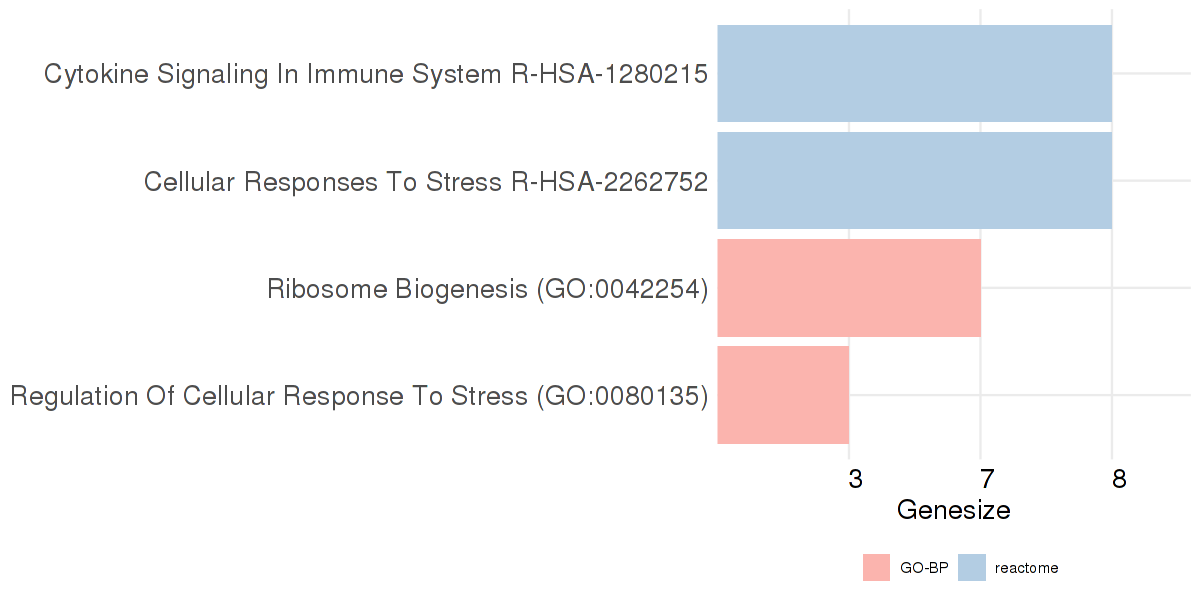

In [45]:
options(repr.plot.width=10, repr.plot.height=5)

require(forcats)

ggplot(enrich_result.p[grep("Immune|To Stress|Cytoplasmic|translation|Ribosome",enrich_result.p$Term),], aes(Genesize, fct_reorder(Term, group),  fill=group)) + 
 geom_col(orientation='y') + 
    #scale_fill_grey(start = 0, end = .9)+
        # xlim(-2.5,2.5)+
    # scale_fill_continuous(low='red', high='blue', guide=guide_colorbar(reverse=TRUE)) + 
scale_fill_brewer(palette = "Pastel1")+
    theme_minimal() + ylab(NULL) +
     theme(legend.position="bottom",
                axis.text.x = element_text(size = 16, hjust = 0, colour = "black"),
                axis.text.y = element_text(size = 16),
                axis.title = element_text(size = 16),
                legend.title = element_blank(),
                legend.background = element_blank())

In [38]:
enrich_result.n <- rbind(cbind(enrich_results.n[[1]],"group"="KEGG"),
                         cbind(enrich_results.n[[2]],"group"="reactome"),
                         cbind(enrich_results.n[[3]],"group"="GO-BP"),
                         cbind(enrich_results.n[[4]],"group"="GO-CC")) %>% 
                        mutate("Genesize" = (str_split_i(Overlap, "\\/",1))) %>%
                        dplyr::filter(Genesize > 2 & P.value < 0.01)
                         #cbind(enrich_results[[5]][grep("phagocy|cili|Cili|Phagocy||lysosom|Lysosom|secre|Secre|exocy|Exocy|exosom|Exosom", enrich_results[[5]] %>% dplyr::filter(P.value <0.1)  %>% pull(Term)),],"group"="GO-MF")
enrich_result.n$Term

[1] "ECM-receptor interaction"                                                                         
  [2] "Other glycan degradation"                                                                         
  [3] "Focal adhesion"                                                                                   
  [4] "Thyroid hormone signaling pathway"                                                                
  [5] "Amino sugar and nucleotide sugar metabolism"                                                      
  [6] "Cholesterol metabolism"                                                                           
  [7] "Complement and coagulation cascades"                                                              
  [8] "RNA polymerase"                                                                                   
  [9] "Toll-like receptor signaling pathway"                                                             
 [10] "Circadian rhythm"                                                                                 
 [11] "Prion diseases"                                                                                   
 [12] "Fc epsilon RI signaling pathway"                                                                  
 [13] "Lysosome"                                                                                         
 [14] "Carbohydrate digestion and absorption"                                                            
 [15] "Human immunodeficiency virus 1 infection"                                                         
 [16] "Disease R-HSA-1643685"                                                                            
 [17] "Innate Immune System R-HSA-168249"                                                                
 [18] "Infectious Disease R-HSA-5663205"                                                                 
 [19] "Immune System R-HSA-168256"                                                                       
 [20] "Defective LFNG Causes SCDO3 R-HSA-5083630"                                                        
 [21] "Synthesis Of UDP-N-acetyl-glucosamine R-HSA-446210"                                               
 [22] "HIV Life Cycle R-HSA-162587"                                                                      
 [23] "mRNA Splicing - Minor Pathway R-HSA-72165"                                                        
 [24] "Plasma Lipoprotein Remodeling R-HSA-8963899"                                                      
 [25] "TP53 Regulates Transcription Of DNA Repair Genes R-HSA-6796648"                                   
 [26] "Synthesis Of Substrates In N-glycan Biosythesis R-HSA-446219"                                     
 [27] "HIV Infection R-HSA-162906"                                                                       
 [28] "Diseases Of Glycosylation R-HSA-3781865"                                                          
 [29] "Plasma Lipoprotein Assembly, Remodeling, And Clearance R-HSA-174824"                              
 [30] "Pre-NOTCH Processing In Golgi R-HSA-1912420"                                                      
 [31] "Binding And Uptake Of Ligands By Scavenger Receptors R-HSA-2173782"                               
 [32] "Diseases Of Metabolism R-HSA-5668914"                                                             
 [33] "Influenza Infection R-HSA-168255"                                                                 
 [34] "Biosynthesis Of N-glycan Precursor (Dolichol LLO) And Transfer To Protein R-HSA-446193"           
 [35] "Regulation Of Complement Cascade R-HSA-977606"                                                    
 [36] "NR1H2 And NR1H3-mediated Signaling R-HSA-9024446"                                                 
 [37] "HS-GAG Degradation R-HSA-2024096"                                                                 
 [38] "Intrinsic Pathway Of Fibrin Clot Formation R-HSA-140837"                 

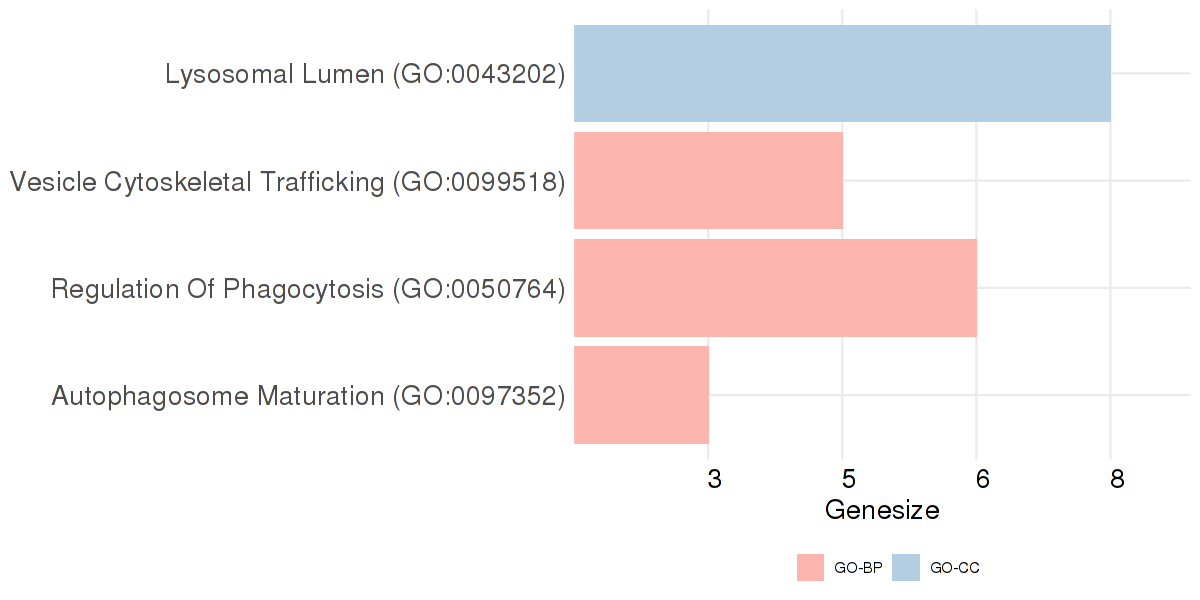

In [48]:
options(repr.plot.width=10, repr.plot.height=5)
require(forcats)

ggplot(enrich_result.n[grep("Autophagosome Maturation|Vesicle Cytoskeletal Trafficking|Lysosomal Lumen|Regulation Of Phagocytosis",enrich_result.n$Term),], aes(Genesize, fct_reorder(Term, group),  fill=group)) + 
 geom_col(orientation='y') + 
    #scale_fill_grey(start = 0, end = .9)+
        # xlim(-2.5,2.5)+
    # scale_fill_continuous(low='red', high='blue', guide=guide_colorbar(reverse=TRUE)) + 
scale_fill_brewer(palette = "Pastel1")+
    theme_minimal() + ylab(NULL) +
     theme(legend.position="bottom",
                axis.text.x = element_text(size = 16, hjust = 0, colour = "black"),
                axis.text.y = element_text(size = 16),
                axis.title = element_text(size = 16),
                legend.title = element_blank(),
                legend.background = element_blank())

In [49]:
require(nichenetr)

group1_genes <- unique(unlist(str_split(enrich_result.p$Genes[grep("To Stress",enrich_result.p$Term)],";"))) %>% convert_human_to_mouse_symbols()#c("Eif4a2","Rpl30","Rplp2","Eif4e")
group2_genes <- unique(unlist(str_split(enrich_result.p$Genes[grep("Immune",enrich_result.p$Term)],";"))) %>% convert_human_to_mouse_symbols()#c("Hsph1","Nup62","Lmna","Rpl36")
group3_genes <- unique(unlist(str_split(enrich_result.p$Genes[grep("Ribosome",enrich_result.p$Term)],";"))) %>% convert_human_to_mouse_symbols()#c("Chid1","Nsf","Scarb1","Asah1","Sdc4")
group4_genes <- unique(unlist(str_split(enrich_result.n$Genes[grep("Autophagosome Maturation|Regulation Of Phagocytosis|Lysosomal Lumen",enrich_result.n$Term)],";"))) %>% convert_human_to_mouse_symbols()#c("Chmp4b","Cd9","Myo5a,","Atp1a3")
group5_genes <- unique(unlist(str_split(enrich_result.n$Genes[grep("Vesicle Cytoskeletal Trafficking",enrich_result.n$Term)],";"))) %>% convert_human_to_mouse_symbols()

Loading required package: nichenetr

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)



In [66]:
enrich_result.p[grep("Immune|To Stress|Cytoplasmic|translation|Ribosome",enrich_result.p$Term),]

-log10(enrich_result.p$Adjusted.P.value[grep("Immune|To Stress|Cytoplasmic|translation|Ribosome",enrich_result.p$Term)])

,Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Odds.Ratio,Combined.Score,Genes,group,Genesize
,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>
35,Cytokine Signaling In Immune System R-HSA-1280215,8/702,5.107667e-03,0.046909889,0,0,3.259875,17.20240,EIF4A2;SEH1L;RNASEH2A;MMP2;NUP62;HMOX1;EIF4E;EIF4G2,reactome,8
36,Cellular Responses To Stress R-HSA-2262752,8/722,6.026450e-03,0.049925911,0,0,3.165266,16.17957,SEH1L;HSPH1;NUP62;LMNA;RPL36;HMOX1;HSPA14;CCAR2,reactome,8
46,Ribosome Biogenesis (GO:0042254),7/155,2.047484e-06,0.001365672,0,0,13.555817,177.56627,BOP1;DDX27;PAK1IP1;MRTO4;ZNF622;DCAF13;BYSL,GO-BP,7
75,Regulation Of Cellular Response To Stress (GO:0080135),3/107,7.887098e-03,0.119561231,0,0,7.831928,37.92632,CHORDC1;ACTL6A;TAF9,GO-BP,3


[1] 1.3287356 1.3016740 2.8646536 0.9224096

In [67]:
enrich_result.n[grep("Autophagosome Maturation|Vesicle Cytoskeletal Trafficking|Lysosomal Lumen|Regulation Of Phagocytosis",enrich_result.n$Term),]

-log10(enrich_result.n$Adjusted.P.value[grep("Autophagosome Maturation|Vesicle Cytoskeletal Trafficking|Lysosomal Lumen|Regulation Of Phagocytosis",enrich_result.n$Term)])

,Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Odds.Ratio,Combined.Score,Genes,group,Genesize
,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>
75,Regulation Of Phagocytosis (GO:0050764),6/58,2.173805e-05,0.0294043562,0,0,11.995142,128.78519,SCARB1;FCER1G;LMAN2;CALR;OLFM4;TLR2,GO-BP,6
76,Vesicle Cytoskeletal Trafficking (GO:0099518),5/39,3.772207e-05,0.0294043562,0,0,15.221743,155.03749,MYO1C;FBXW11;HTT;MYO5A;MYO1G,GO-BP,5
111,Autophagosome Maturation (GO:0097352),3/44,9.139240e-03,0.1943530309,0,0,7.492607,35.17912,BECN1;TSG101;VPS16,GO-BP,3
114,Lysosomal Lumen (GO:0043202),8/86,2.035467e-06,0.0001289129,0,0,10.761593,141.02837,CHID1;GALC;SDC4;TCN2;IDUA;GLB1;NEU1;OGN,GO-CC,8


[1] 1.5315883 1.5315883 0.7114087 3.8897037

Warning message:
“Removed 191 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 421 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 421 rows containing missing values (`geom_text_repel()`).”


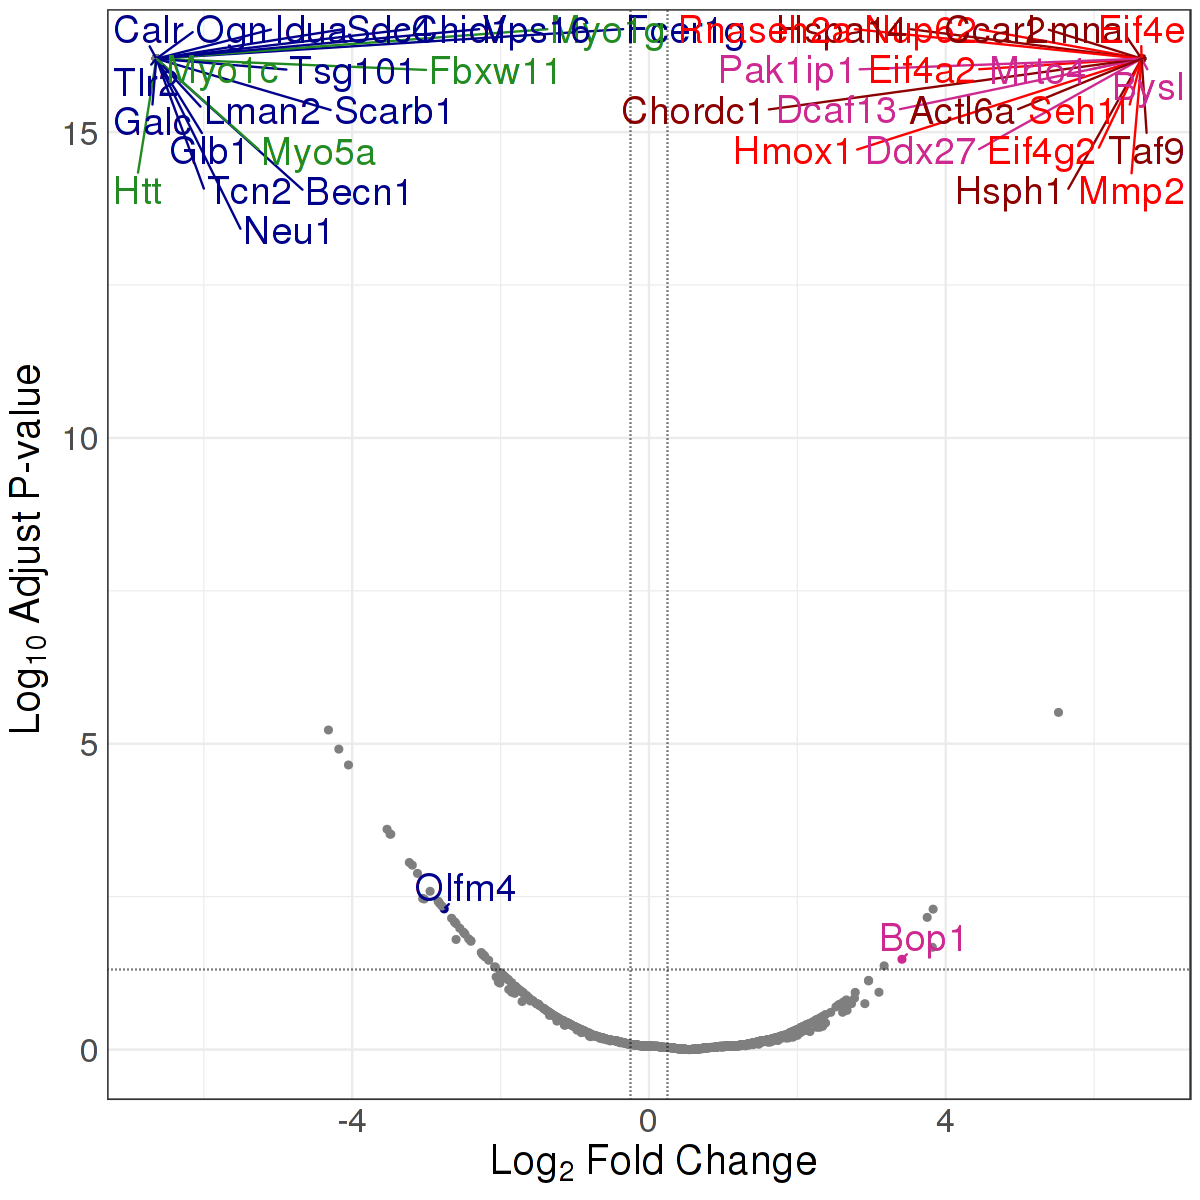

Warning message:
“Removed 191 rows containing missing values (`geom_point()`).”


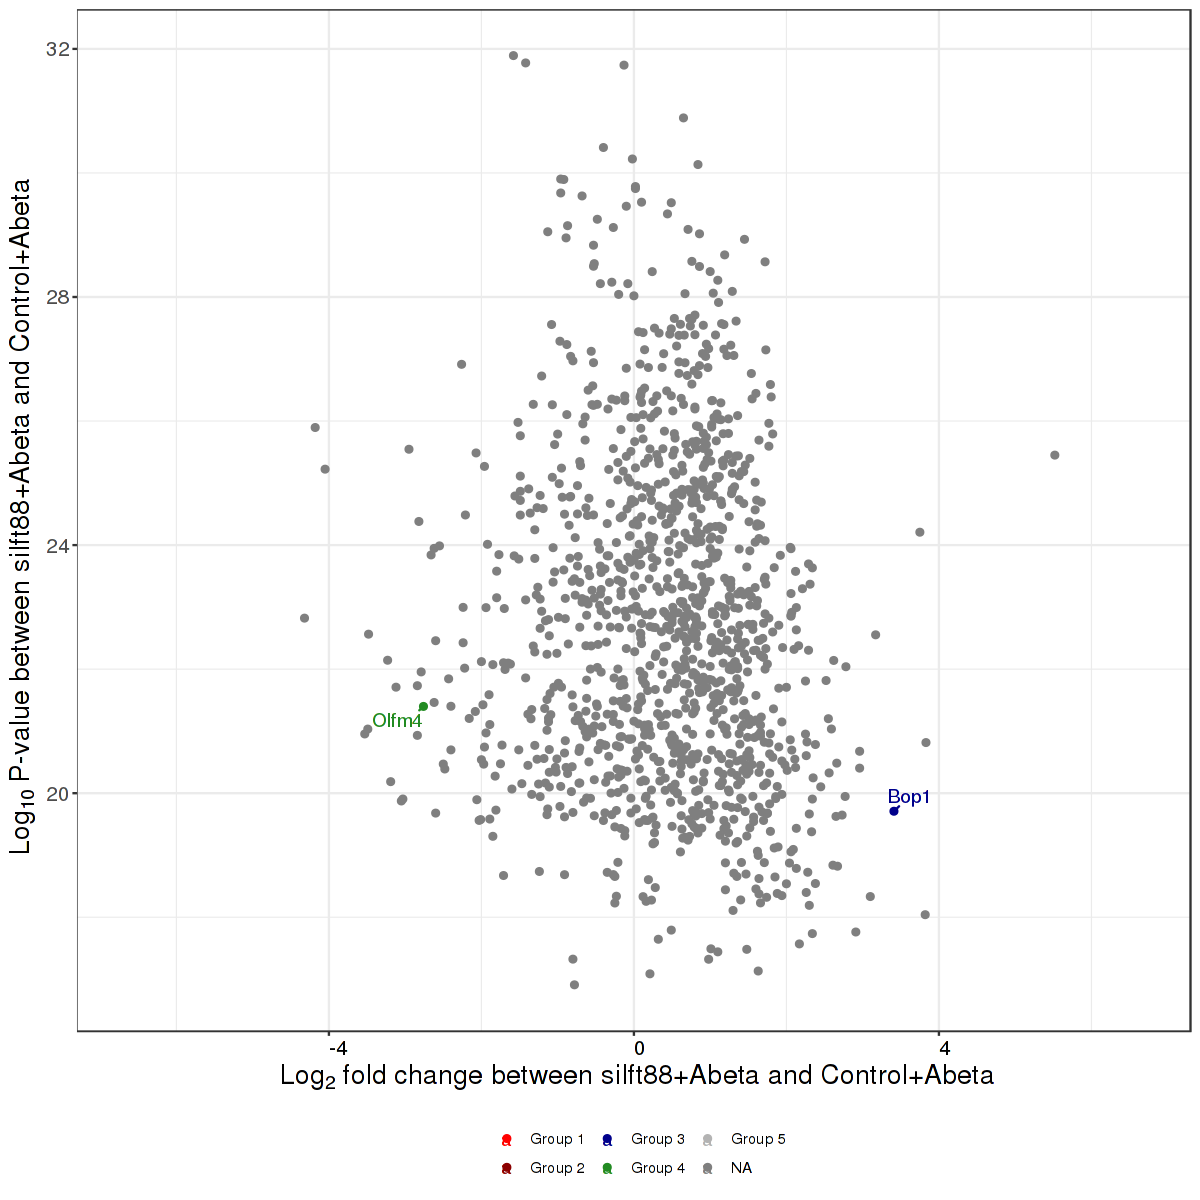

In [64]:

# options(repr.plot.width = 16, repr.plot.height = 16)
keyvals.colour <- c()
keyvals.colour <- ifelse(objDat$Gene.names %in% group1_genes, 'darkred', 'grey50')
keyvals.colour[objDat$Gene.names %in% group2_genes] <- "red"
keyvals.colour[objDat$Gene.names %in% group3_genes] <- "maroon3"
keyvals.colour[objDat$Gene.names %in% group4_genes] <- "blue4"
keyvals.colour[objDat$Gene.names %in% group5_genes] <- "forestgreen"
keyvals.colour[is.na(keyvals.colour)] <- 'grey70'

names(keyvals.colour)[keyvals.colour == 'grey70'] <- 'ns'
names(keyvals.colour)[keyvals.colour == 'darkred'] <- 'Group 1'
names(keyvals.colour)[keyvals.colour == 'red'] <- 'Group 2'
names(keyvals.colour)[keyvals.colour == 'maroon3'] <- 'Group 3'
names(keyvals.colour)[keyvals.colour == 'blue4'] <- 'Group 4'
names(keyvals.colour)[keyvals.colour == 'forestgreen'] <- 'Group 5'



objDat$group <- names(keyvals.colour)
options(repr.plot.width=10, repr.plot.height=10)
require(RColorBrewer)
require(ggrepel)

p1<-ggplot(objDat, aes(x=Abundance.Ratio.log2, y=-log10(Abundance.Ratio.P_Value), color =group)) + 
  geom_point() +
  geom_text_repel(data = objDat[objDat$Gene.names %in% c(group1_genes,group2_genes,group3_genes,group4_genes,group5_genes)  ,],
                  aes(label=Gene.names), 
                  size = 8,
                  fontface = "italic", 
                  arrow = arrow(length = unit(0.0001, "npc")),
                  #colour = objDat$group,
                  max.overlaps = 41, min.segment.length=0.1)+
  xlab(bquote(~Log[2]~ 'Fold Change'))+
  ylab(bquote(~Log[10]~ 'Adjust P-value'))+
  scale_colour_manual(values = c("darkred","red","maroon3","blue4","forestgreen","grey70"))+ 
        geom_vline(xintercept=c(-0.25, 0.25), col="black", linetype="dotted") +
        geom_hline(yintercept=-log10(0.05), col="black", linetype="dotted") +
  theme_bw()+
  theme(legend.position = "bottom",  
        axis.title = element_text(size = 24, face = "bold"), 
        plot.title = element_blank(), 
        axis.text = element_text(size = 20),  
        axis.line = element_blank(), 
        axis.ticks = element_blank(),
        # legend.key.size = unit(1, 'in'),
         legend.title = element_blank(),
        legend.text = element_text(size=20))    + 
   theme(legend.position = "none")

print(p1)

p2<-ggplot(objDat, aes(x=Abundance.Ratio.log2, y=Abundance.Ratio.Weight, color =group)) + 
  geom_point() +
  geom_text_repel(data = objDat,
                  aes(label=ifelse(objDat$Gene.names %in% c(group1_genes,group2_genes,group3_genes,group4_genes),Gene.names,"")), 
                  arrow = arrow(length = unit(0.0001, "npc")),
                  #colour = objDat$group,
                  max.overlaps = 100, min.segment.length=0.1)+
  xlab(bquote(~Log[2]~ 'fold change between siIft88+Abeta and Control+Abeta'))+
  ylab(bquote(~Log[10]~ 'P-value between siIft88+Abeta and Control+Abeta'))+
  scale_colour_manual(values = c("red","darkred","blue4","forestgreen","grey70"))+ 
  
  theme_bw()+
  theme(legend.position=c(0.9, 0.2),
        axis.text.x = element_text(size = 12, hjust = 0, colour = "black"),
        axis.text.y = element_text(size = 12),
        axis.title = element_text(size = 16),
        legend.title = element_blank(),
        legend.background = element_blank()) + 
   theme(legend.position = "bottom")

print(p2)


ggsave(paste0(path,"/results/Figure6e_BVsiIft88_Exo_Volcano plot22.pdf"), p1, width =7.5, height =7.5, units = "in", device = "pdf", dpi = 600)
#ggsave(paste0(path,"/results/BVsiIft88_Exo_ScatterPlot plot22.pdf"), p2, width =7.5, height =7.5, units = "in", device = "pdf", dpi = 600)

In [14]:
objDat[objDat$Gene.names %in% c(group1_genes,group2_genes,group3_genes,group4_genes),]

Gene.names,Accession,Abundance.Ratio.log2,Abundance.Ratio.P_Value,Abundance.Ratio.Weight,group
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
Sdc4,O35988,-6.64,6.290761e-17,NA,Group 3
Eif4a2,P10630,6.64,6.290761e-17,NA,Group 1
Cd9,P40240,-1.80,9.207295e-02,23.57946,Group 4
Nsf,P46460,-6.64,6.290761e-17,NA,Group 3
Rpl36,P47964,6.64,6.290761e-17,NA,Group 2
Lmna,P48678,6.64,6.290761e-17,NA,Group 2
Rpl30,P62889,2.52,2.008738e-01,21.81641,Group 1
Eif4e,P63073,6.64,6.290761e-17,NA,Group 1
Rplp2,P99027,2.96,7.551788e-02,20.67534,Group 1


In [15]:
colnames(objDat)
insAccs <- objDat %>% dplyr::filter(abs(Abundance.Ratio.log2) > 1.5 & Abundance.Ratio.P_Value < 0.05) %>% pull(Accession)

[1] "Gene.names"              "Accession"              
[3] "Abundance.Ratio.log2"    "Abundance.Ratio.P_Value"
[5] "Abundance.Ratio.Weight"  "group"

In [68]:
require(xlsx)
write.xlsx(enrich_result.p, paste0(path,"/results/Figure6f_BVsiIft88_exosome_pathwayP.xlsx"))
write.xlsx(enrich_result.n, paste0(path,"/results/Figure6f_BVsiIft88_exosome_pathwayN.xlsx"))

Loading required package: xlsx



In [ ]:
library("STRINGdb")
figure_network<-list()

string_db <- STRINGdb$new( version="11.5", species=10090, score_threshold=00, input_directory="~/R") #mouse : 10090, human : 9606
# map to STRING


example1_mapped = string_db$map( objDat[which(objDat$Accession %in% insAccs),], "Gene.names", removeUnmappedRows = TRUE )

example1_mapped_pval05 = string_db$add_diff_exp_color( subset(example1_mapped, Abundance.Ratio.P_Value<0.01), logFcColStr='Abundance.Ratio.log2')    
payload_id = string_db$post_payload( example1_mapped_pval05$STRING_id, colors=example1_mapped_pval05$color )

hits = example1_mapped_pval05$STRING_id

#tiff(paste0(pathXLS,"/results/Figure_APP_IP.tiff"), width=5, height=5, units="in",
#    pointsize=8, compression="lzw", bg="white", res=600)
string_db$plot_network(hits)
#dev.off()
# get clusters


In [ ]:
colnames(objDat)
insAccs <- objDat %>% dplyr::filter(abs(Abundance.Ratio.log2) > 0.5 & Abundance.Ratio.P_Value < 0.01) %>% pull(Accession)

In [ ]:
clustersList = string_db$get_clusters(example1_mapped_pval05$STRING_id)
length(clustersList)

print(clustersList)

In [ ]:
resList <- lapply(clustersList, function(cls) {

    res <- string_db$add_proteins_description(data.frame(STRING_id = cls))
    
    #clustersList[[1]] %>% length()
#print(res$preferred_name)
#paste0(c(group1_genes,group2_genes,group3_genes,group4_genes), collapse = "|")

    return(grep(paste0(c(group1_genes,group2_genes,group3_genes,group4_genes), collapse = "|"), res$preferred_name, value = TRUE))
  
})





In [ ]:
print(resList)

In [ ]:
string_db$plot_network(clustersList[[1]])
string_db$plot_network(clustersList[[2]])
string_db$plot_network(clustersList[[3]])
string_db$plot_network(clustersList[[4]])

In [ ]:
c(group1_genes,group2_genes,group3_genes,group4_genes) %>% print()